## FastTag Fraud Detection 

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'FastagFraudDetection.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [2]:
df.describe(include='all')


,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
count,5000.000000,5000,5000,4451,5000,5000,5000,5000.00000,5000.000000,5000,5000.000000,5000,5000
unique,NaN,4423,7,4451,6,2,3,NaN,NaN,5,NaN,5000,2
top,NaN,1/1/2023 8:15,Bus,FTG-001-ABC-121,B-102,Regular,Large,NaN,NaN,"13.059816123454882, 77.77068662374292",NaN,KA11AB1234,Not Fraud
freq,NaN,5,716,1,1432,2858,2144,NaN,NaN,1000,NaN,1,4017
mean,2500.500000,NaN,NaN,NaN,NaN,NaN,NaN,161.06200,141.261000,NaN,67.851200,NaN,NaN
std,1443.520003,NaN,NaN,NaN,NaN,NaN,NaN,112.44995,106.480996,NaN,16.597547,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,NaN,10.000000,NaN,NaN
25%,1250.750000,NaN,NaN,NaN,NaN,NaN,NaN,100.00000,90.000000,NaN,54.000000,NaN,NaN
50%,2500.500000,NaN,NaN,NaN,NaN,NaN,NaN,130.00000,120.000000,NaN,67.000000,NaN,NaN
75%,3750.250000,NaN,NaN,NaN,NaN,NaN,NaN,290.00000,160.000000,NaN,82.000000,NaN,NaN


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


# Univariate Analysis

# 1. Distribution of Transaction Amounts

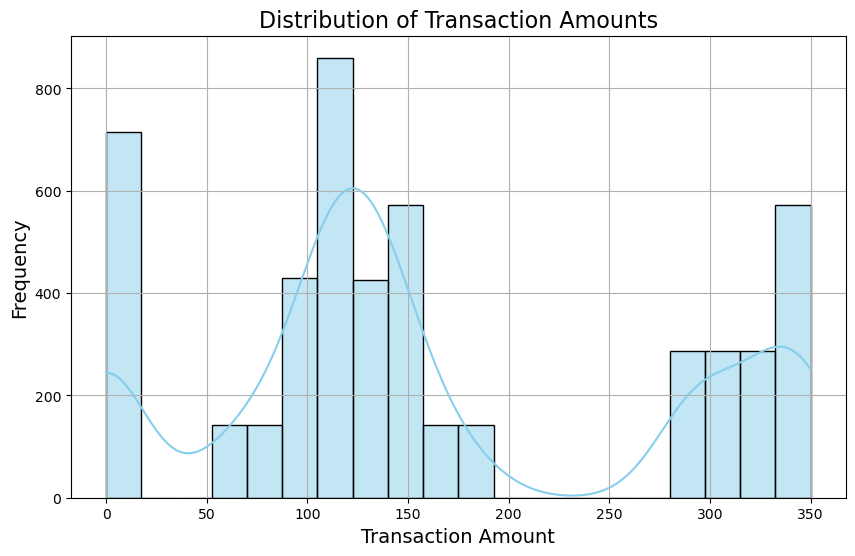

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Transaction_Amount'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Transaction Amounts', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


# 2. Distribution of Vehicle Types


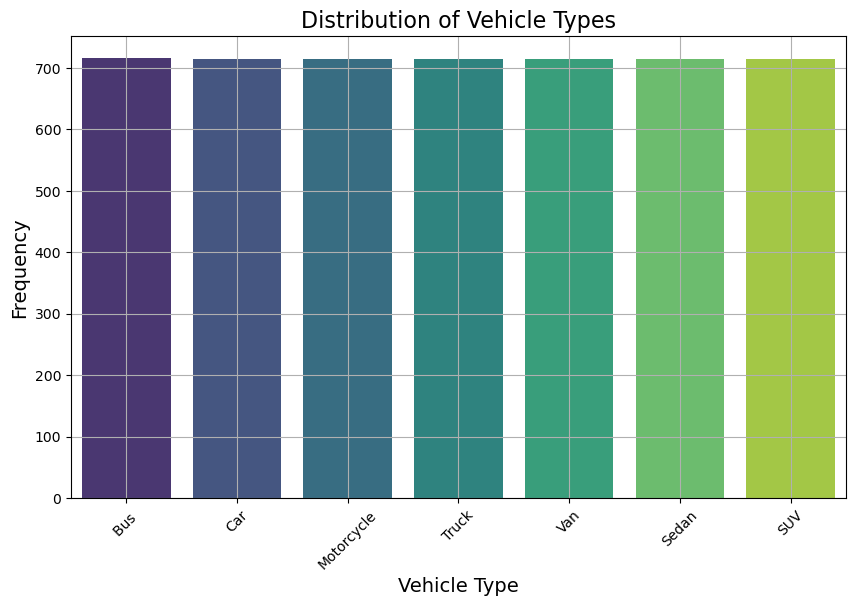

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Vehicle_Type', palette='viridis')
plt.title('Distribution of Vehicle Types', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# 3. Distribution of Fraud Indicators

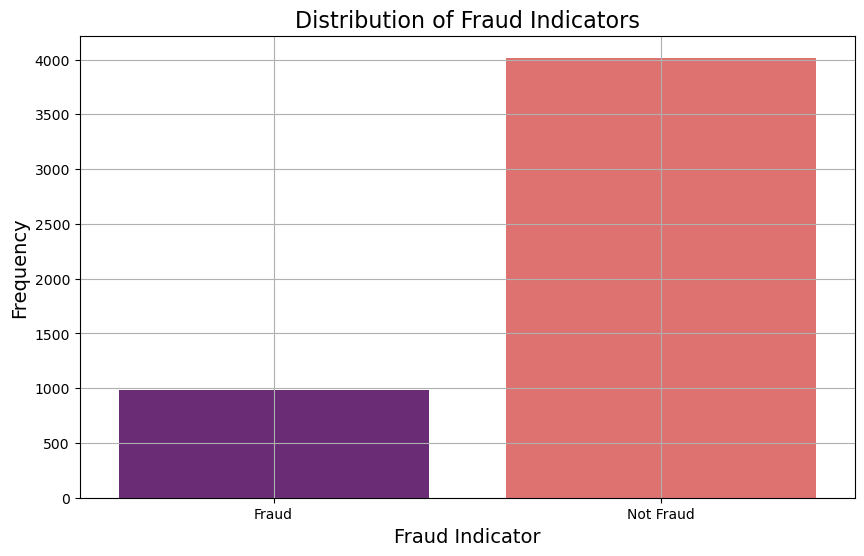

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Fraud_indicator', palette='magma')
plt.title('Distribution of Fraud Indicators', fontsize=16)
plt.xlabel('Fraud Indicator', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

# Bivariate Analysis

# 1. Relationship between Vehicle Speed and Fraud Indicator

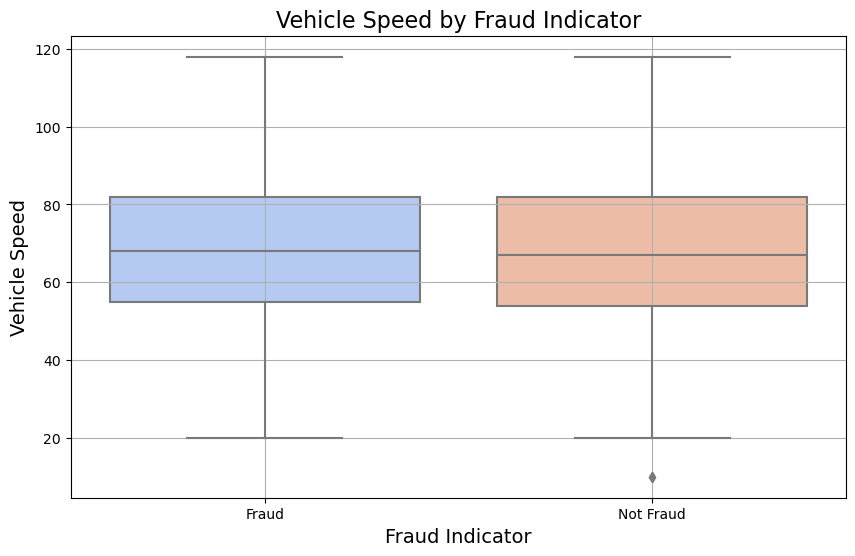

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Fraud_indicator', y='Vehicle_Speed', palette='coolwarm')
plt.title('Vehicle Speed by Fraud Indicator', fontsize=16)
plt.xlabel('Fraud Indicator', fontsize=14)
plt.ylabel('Vehicle Speed', fontsize=14)
plt.grid(True)
plt.show()

# 2. Transaction Amount vs Amount Paid

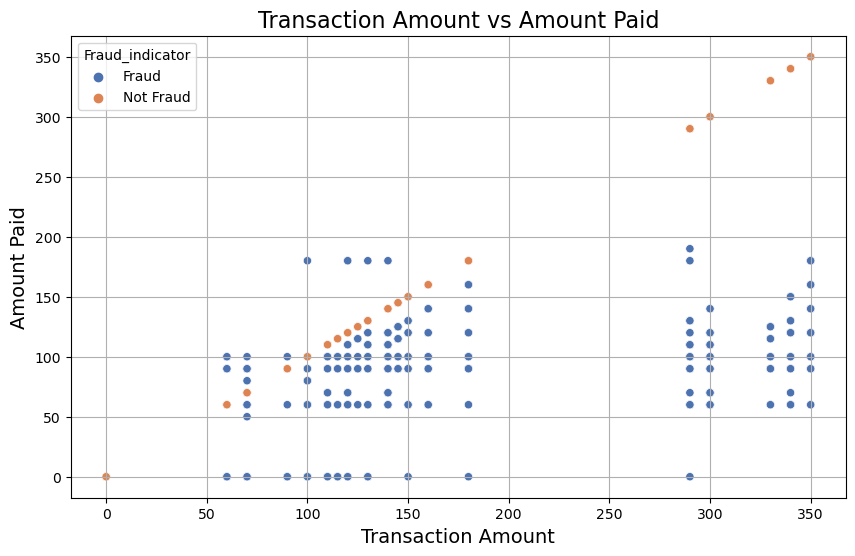

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Transaction_Amount', y='Amount_paid', hue='Fraud_indicator', palette='deep')
plt.title('Transaction Amount vs Amount Paid', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Amount Paid', fontsize=14)
plt.grid(True)
plt.show()

## Investigating Outliers
Outliers can significantly impact the analysis and understanding of data. Identifying and understanding outliers is crucial for ensuring the accuracy of our analysis. Here, we focus on investigating outliers in three key columns: Transaction_Amount, Amount_paid, and Vehicle_Speed.

In [9]:
# Function to plot outliers
def plot_outliers(df, column):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[column], palette='coolwarm')
    plt.title(f'Boxplot of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.grid(True)
    plt.show()

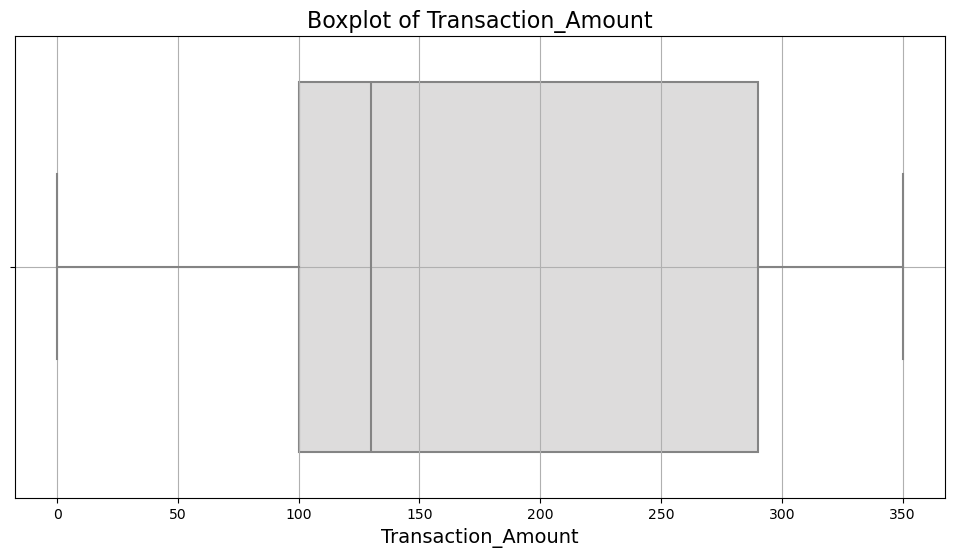

In [10]:
# Investigate Outliers for Transaction Amount
plot_outliers(df, 'Transaction_Amount')

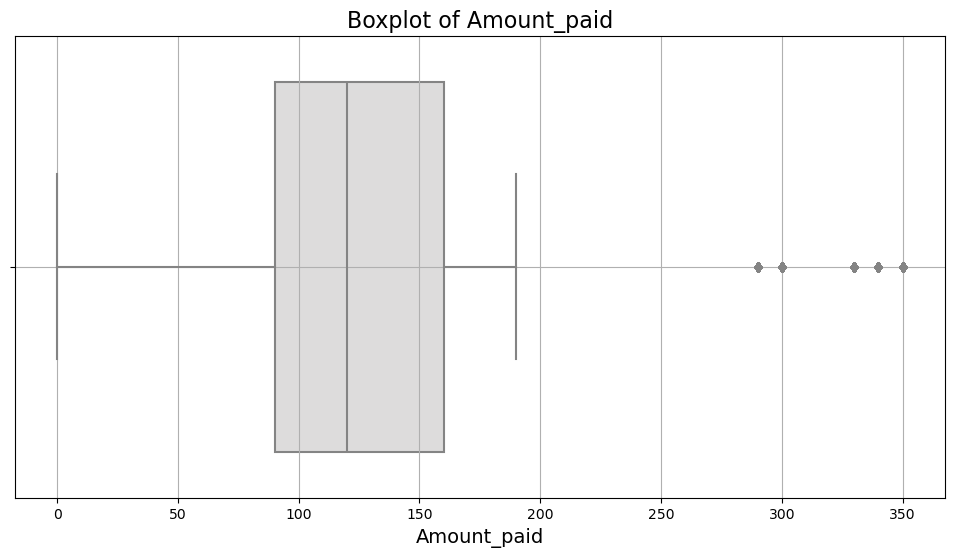

In [11]:
# Investigate Outliers for Amount Paid
plot_outliers(df, 'Amount_paid')

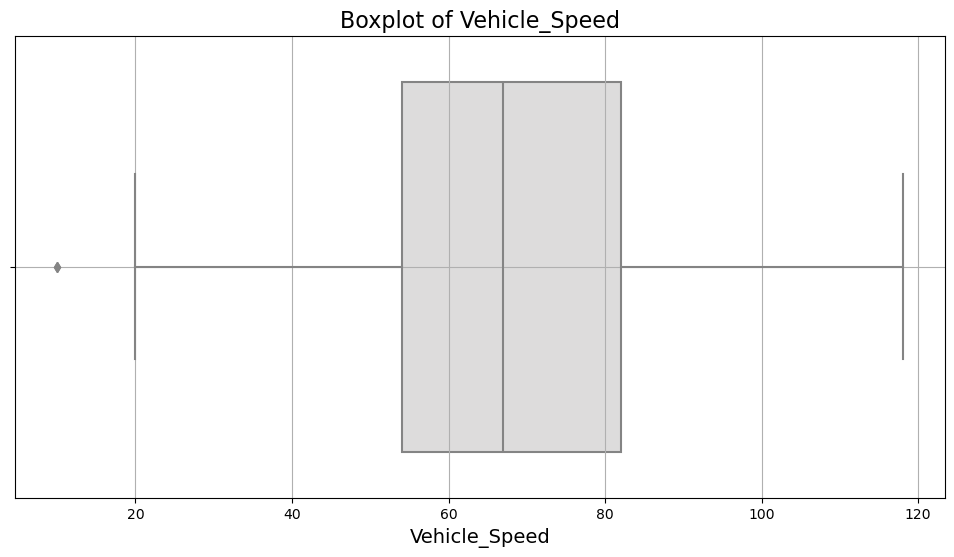

In [12]:
# Investigate Outliers for Vehicle Speed
plot_outliers(df, 'Vehicle_Speed')

In [13]:
# Additional insights: Display rows with outliers in Transaction Amount
q1 = df['Transaction_Amount'].quantile(0.25)
q3 = df['Transaction_Amount'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['Transaction_Amount'] < lower_bound) | (df['Transaction_Amount'] > upper_bound)]
print("Outliers in Transaction Amount:")
print(outliers)

Outliers in Transaction Amount:
Empty DataFrame
Columns: [Transaction_ID, Timestamp, Vehicle_Type, FastagID, TollBoothID, Lane_Type, Vehicle_Dimensions, Transaction_Amount, Amount_paid, Geographical_Location, Vehicle_Speed, Vehicle_Plate_Number, Fraud_indicator]
Index: []


## Correlation Analysis
Correlation analysis helps identify relationships between different variables in the dataset. By examining the correlation matrix, we can understand how variables are related to each other and identify any strong relationships that may exist.

Correlation Matrix
The correlation matrix below shows the correlation coefficients between all pairs of variables in the dataset. The coefficients range from -1 to 1, where:

1 indicates a perfect positive correlation.
-1 indicates a perfect negative correlation.
0 indicates no correlation.

In [14]:
# Convert necessary columns to appropriate data types
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Transaction_Amount'] = df['Transaction_Amount'].astype(float)
df['Amount_paid'] = df['Amount_paid'].astype(float)
df['Vehicle_Speed'] = df['Vehicle_Speed'].astype(float)

In [15]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

C:\Users\hp\AppData\Local\Temp\ipykernel_10592\3125328284.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


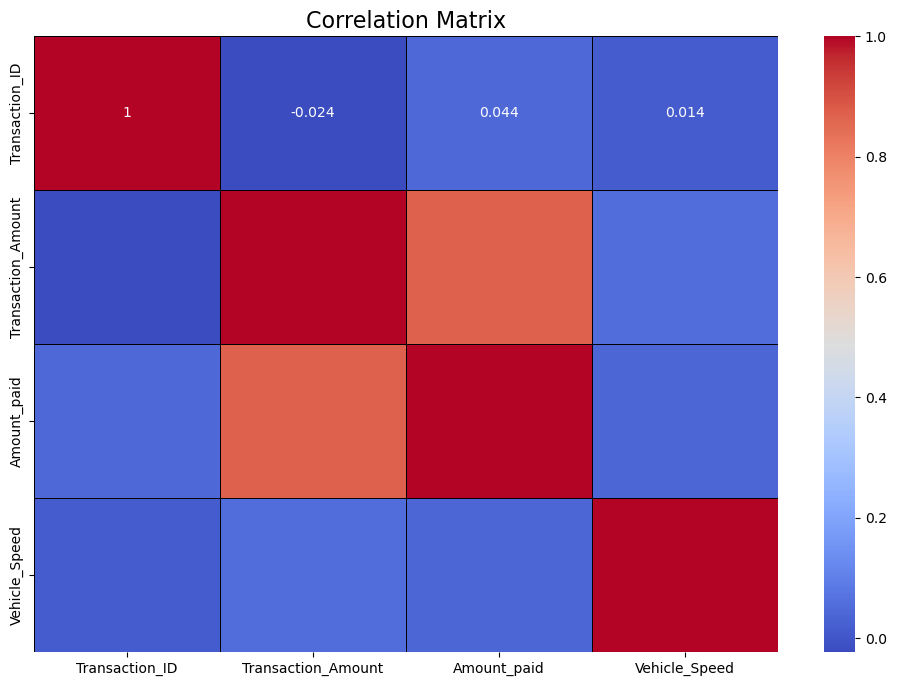

In [16]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [17]:
# Identify strong correlations
correlation_threshold = 0.5
strong_correlations = correlation_matrix[(correlation_matrix.abs() > correlation_threshold) & (correlation_matrix != 1.0)]
print("Strong Correlations:")
print(strong_correlations.dropna(how='all').dropna(axis=1, how='all'))


Strong Correlations:
                    Transaction_Amount  Amount_paid
Transaction_Amount                 NaN     0.870078
Amount_paid                   0.870078          NaN


## Creating New Features
Based on the initial insights, creating new features can enhance our ability to predict fraud. Here, we focus on creating temporal features that can provide additional context to each transaction.

Temporal Features
Temporal features can capture patterns related to the time of transactions, which may be relevant for identifying fraudulent activities. We create the following features from the Timestamp column:

Hour: The hour of the day when the transaction occurred.
Day: The day of the month when the transaction occurred.
Month: The month when the transaction occurred.
Day_of_Week: The day of the week when the transaction occurred.
Is_Weekend: A binary indicator of whether the transaction occurred on a weekend (Saturday or Sunday).

In [18]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %H:%M')

# Create temporal features
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Day_of_Week'] = df['Timestamp'].dt.dayofweek
df['Is_Weekend'] = df['Day_of_Week'].isin([5, 6]).astype(int)

# Display the dataframe with new features
df.head()


,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,Day,Month,Day_of_Week,Is_Weekend
0,1,2023-01-06 11:20:00,Bus,FTG-001-ABC-121,A-101,Express,Large,350.0,120.0,"13.059816123454882, 77.77068662374292",65.0,KA11AB1234,Fraud,11,6,1,4,0
1,2,2023-01-07 14:55:00,Car,FTG-002-XYZ-451,B-102,Regular,Small,120.0,100.0,"13.059816123454882, 77.77068662374292",78.0,KA66CD5678,Fraud,14,7,1,5,1
2,3,2023-01-08 18:25:00,Motorcycle,NaN,D-104,Regular,Small,0.0,0.0,"13.059816123454882, 77.77068662374292",53.0,KA88EF9012,Not Fraud,18,8,1,6,1
3,4,2023-01-09 02:05:00,Truck,FTG-044-LMN-322,C-103,Regular,Large,350.0,120.0,"13.059816123454882, 77.77068662374292",92.0,KA11GH3456,Fraud,2,9,1,0,0
4,5,2023-01-10 06:35:00,Van,FTG-505-DEF-652,B-102,Express,Medium,140.0,100.0,"13.059816123454882, 77.77068662374292",60.0,KA44IJ6789,Fraud,6,10,1,1,0


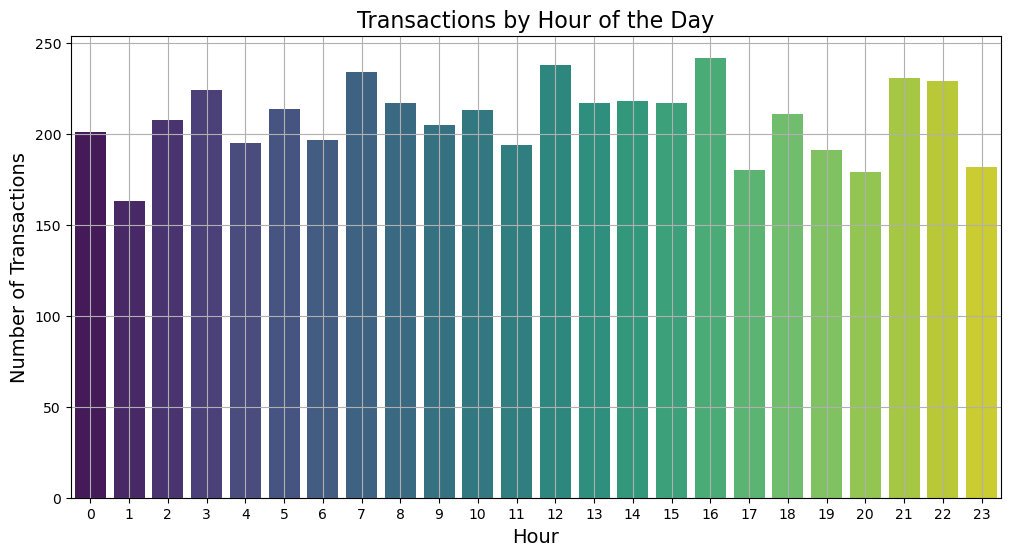

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Hour', palette='viridis')
plt.title('Transactions by Hour of the Day', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.grid(True)
plt.show()


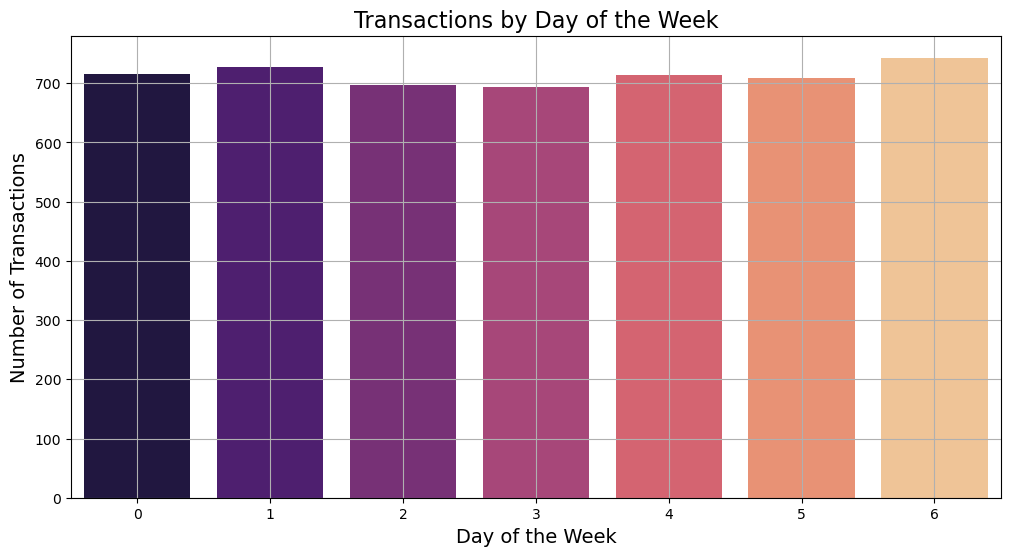

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Day_of_Week', palette='magma')
plt.title('Transactions by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.grid(True)
plt.show()


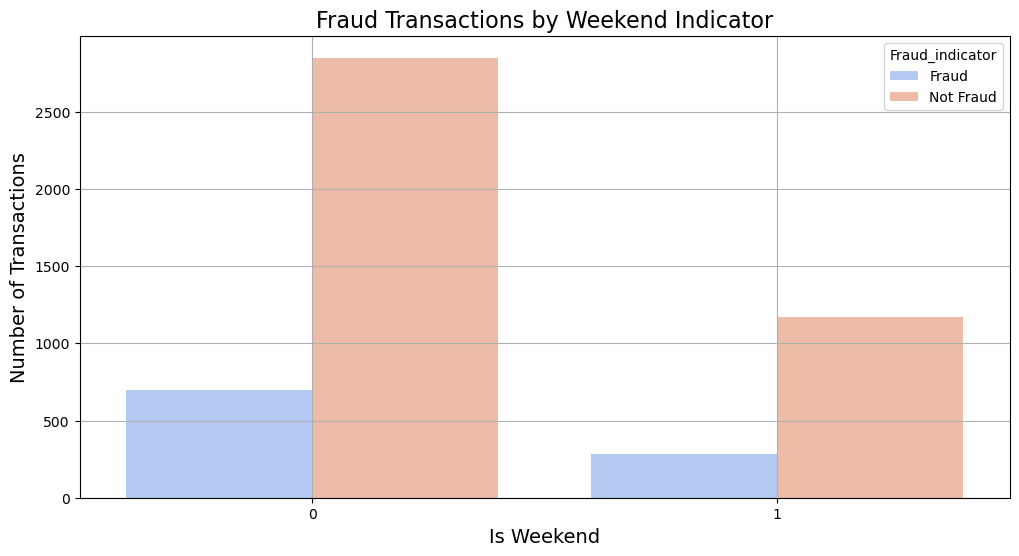

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Is_Weekend', hue='Fraud_indicator', palette='coolwarm')
plt.title('Fraud Transactions by Weekend Indicator', fontsize=16)
plt.xlabel('Is Weekend', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.grid(True)
plt.show()


In [22]:
from scipy import stats
import numpy as np
from geopy.distance import geodesic

# Creating Additional Features
To enhance the predictive power of our model, we create new features that can provide additional context to each transaction. These features are derived from initial insights and focus on anomalies and patterns in the data.

### Transaction Amount Anomalies
Transaction_Amount_Percentile: Percentile of the transaction amount relative to other transactions.
High_Transaction_Amount: Binary indicator for transactions above a certain threshold.

### Vehicle Speed Anomalies
Speed_Above_Limit: Binary indicator if the vehicle speed exceeds a predefined speed limit.
Speed_Deviation: Deviation of the vehicle speed from the average speed of that vehicle type.

### Payment Anomalies
Underpaid_Amount: Difference between the transaction amount and the amount paid.
Is_Underpaid: Binary indicator if the amount paid is less than the transaction amount.

### Geographical Features
Distance_From_Last_Toll: Distance from the last recorded toll booth location.
Is_Same_Location: Binary indicator if the geographical location is the same as the last recorded location.

### Temporal Patterns
Is_Night_Transaction: Binary indicator for transactions that occur at night (e.g., between 10 PM and 6 AM).
Transaction_Interval: Time interval since the last transaction for the same vehicle.


Creating and analyzing these new features can help in identifying patterns that could be indicative of fraud, thus improving the effectiveness of fraud detection models.








In [25]:
# Transaction Amount Percentile
df['Transaction_Amount_Percentile'] = df['Transaction_Amount'].rank(pct=True)

# High Transaction Amount
high_amount_threshold = 300  # Example threshold, adjust based on data distribution
df['High_Transaction_Amount'] = (df['Transaction_Amount'] > high_amount_threshold).astype(int)

# Speed Above Limit
speed_limit = 80  # Example speed limit, adjust based on data
df['Speed_Above_Limit'] = (df['Vehicle_Speed'] > speed_limit).astype(int)

# Speed Deviation
df['Average_Speed_By_Type'] = df.groupby('Vehicle_Type')['Vehicle_Speed'].transform('mean')
df['Speed_Deviation'] = df['Vehicle_Speed'] - df['Average_Speed_By_Type']

# Underpaid Amount
df['Underpaid_Amount'] = df['Transaction_Amount'] - df['Amount_paid']
df['Is_Underpaid'] = (df['Underpaid_Amount'] > 0).astype(int)



In [26]:
# Geographical Features
# Assuming data is sorted by Timestamp for calculating distance and interval features
df = df.sort_values(by=['Vehicle_Plate_Number', 'Timestamp'])

# Distance from Last Toll
df['Geographical_Location'] = df['Geographical_Location'].apply(lambda x: tuple(map(float, x.split(', '))))
df['Prev_Geographical_Location'] = df.groupby('Vehicle_Plate_Number')['Geographical_Location'].shift()
df['Distance_From_Last_Toll'] = df.apply(lambda row: geodesic(row['Geographical_Location'], row['Prev_Geographical_Location']).km if pd.notnull(row['Prev_Geographical_Location']) else 0, axis=1)

# Is Same Location
df['Is_Same_Location'] = (df['Geographical_Location'] == df['Prev_Geographical_Location']).astype(int)

# Is Night Transaction
df['Is_Night_Transaction'] = df['Hour'].apply(lambda x: 1 if x >= 22 or x <= 6 else 0)

# Transaction Interval
df['Prev_Timestamp'] = df.groupby('Vehicle_Plate_Number')['Timestamp'].shift()
df['Transaction_Interval'] = (df['Timestamp'] - df['Prev_Timestamp']).dt.total_seconds() / 3600  # Interval in hours

# Display the dataframe with new features
df.head()



# Save the new dataframe with additional features
df.to_csv('FastagFraudDetection_with_features.csv', index=False)

In [27]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,...,Average_Speed_By_Type,Speed_Deviation,Underpaid_Amount,Is_Underpaid,Prev_Geographical_Location,Distance_From_Last_Toll,Is_Same_Location,Is_Night_Transaction,Prev_Timestamp,Transaction_Interval
2027,2028,2023-09-04 19:55:00,Van,FTG-358-PQR-012,B-102,Regular,Medium,125.0,125.0,"(13.21331620748757, 77.55413526894684)",...,67.422969,21.577031,0.0,0,NaN,0,0,0,NaT,NaN
2328,2329,2023-04-14 01:30:00,Van,FTG-288-WAX-876,B-102,Express,Medium,125.0,90.0,"(13.21331620748757, 77.55413526894684)",...,67.422969,-9.422969,35.0,1,NaN,0,0,1,NaT,NaN
642,643,2023-04-08 13:55:00,Sedan,FTG-823-NMK-365,A-101,Express,Medium,100.0,100.0,"(13.042660878688794, 77.47580097259879)",...,67.904762,-22.904762,0.0,0,NaN,0,0,0,NaT,NaN
4973,4974,2023-12-27 19:04:00,Motorcycle,NaN,D-106,Regular,Small,0.0,0.0,"(13.21331620748757, 77.55413526894684)",...,67.663866,16.336134,0.0,0,NaN,0,0,0,NaT,NaN
2030,2031,2023-09-07 14:25:00,Bus,FTG-057-YZA-901,C-103,Express,Large,330.0,330.0,"(13.21331620748757, 77.55413526894684)",...,67.946927,-1.946927,0.0,0,NaN,0,0,0,NaT,NaN


C:\Users\hp\AppData\Local\Temp\ipykernel_10592\1084322235.py:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



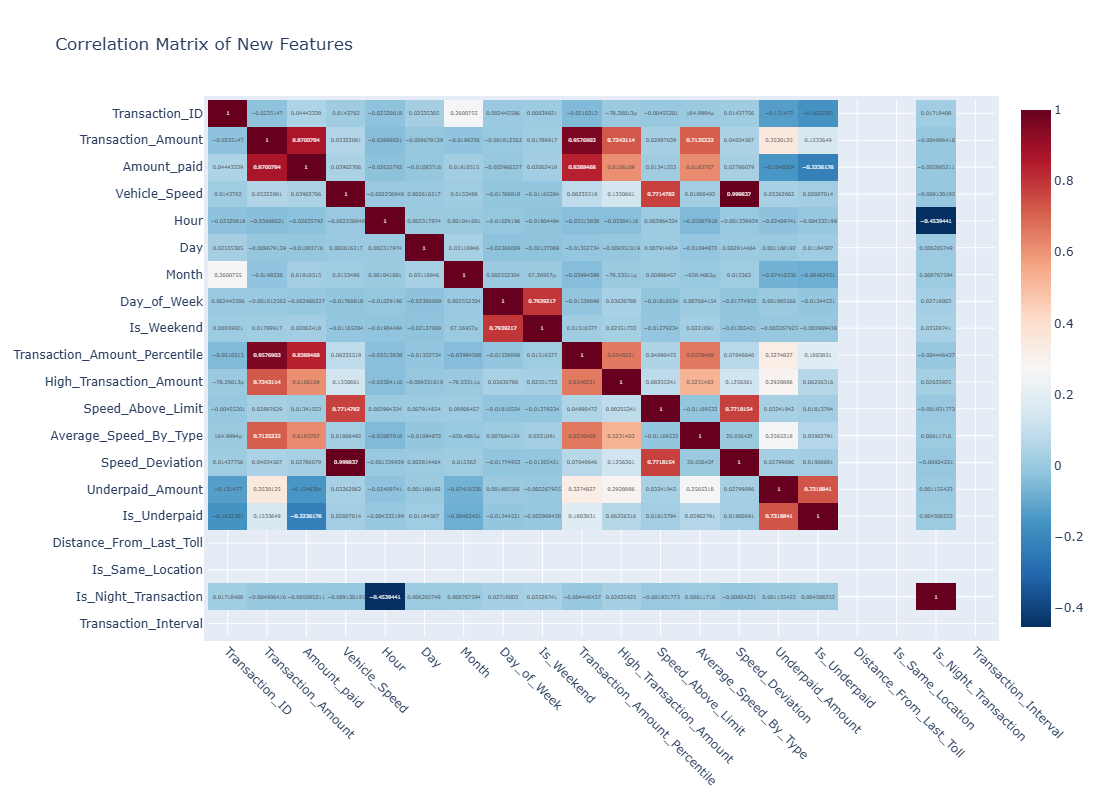

In [33]:
import plotly.express as px



# Calculate the correlation matrix for the new features
correlation_matrix = df.corr()

# Create an interactive heatmap using Plotly with improved readability
fig = px.imshow(correlation_matrix, 
                text_auto=True, 
                aspect="auto", 
                color_continuous_scale='RdBu_r', 
                title='Correlation Matrix of New Features')

# Update layout for better readability
fig.update_layout(
    autosize=False,
    width=1200,
    height=800,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    xaxis=dict(tickangle=45),
    yaxis=dict(tickmode='linear')
)

# Show the interactive plot
fig.show()

### Feature impact on Fraud

In [37]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score






In [36]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %H:%M')

# Existing temporal features
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Day_of_Week'] = df['Timestamp'].dt.dayofweek
df['Is_Weekend'] = df['Day_of_Week'].isin([5, 6]).astype(int)

# Transaction Amount Percentile
df['Transaction_Amount_Percentile'] = df['Transaction_Amount'].rank(pct=True)

# High Transaction Amount
high_amount_threshold = 300  # Example threshold, adjust based on data distribution
df['High_Transaction_Amount'] = (df['Transaction_Amount'] > high_amount_threshold).astype(int)

# Speed Above Limit
speed_limit = 80  # Example speed limit, adjust based on data
df['Speed_Above_Limit'] = (df['Vehicle_Speed'] > speed_limit).astype(int)

# Speed Deviation
df['Average_Speed_By_Type'] = df.groupby('Vehicle_Type')['Vehicle_Speed'].transform('mean')
df['Speed_Deviation'] = df['Vehicle_Speed'] - df['Average_Speed_By_Type']

# Underpaid Amount
df['Underpaid_Amount'] = df['Transaction_Amount'] - df['Amount_paid']
df['Is_Underpaid'] = (df['Underpaid_Amount'] > 0).astype(int)

# Geographical Features
df = df.sort_values(by=['Vehicle_Plate_Number', 'Timestamp'])

# Ensure Geographical_Location column is properly formatted
def parse_location(loc):
    try:
        return tuple(map(float, loc.split(', ')))
    except Exception:
        return (None, None)

df['Geographical_Location'] = df['Geographical_Location'].apply(parse_location)
df['Prev_Geographical_Location'] = df.groupby('Vehicle_Plate_Number')['Geographical_Location'].shift()

# Calculate distance from the last toll booth
def calculate_distance(row):
    if row['Geographical_Location'] == (None, None) or row['Prev_Geographical_Location'] == (None, None):
        return 0
    return geodesic(row['Geographical_Location'], row['Prev_Geographical_Location']).km

df['Distance_From_Last_Toll'] = df.apply(calculate_distance, axis=1)

# Is Same Location
df['Is_Same_Location'] = (df['Geographical_Location'] == df['Prev_Geographical_Location']).astype(int)

# Is Night Transaction
df['Is_Night_Transaction'] = df['Hour'].apply(lambda x: 1 if x >= 22 or x <= 6 else 0)

# Transaction Interval
df['Prev_Timestamp'] = df.groupby('Vehicle_Plate_Number')['Timestamp'].shift()
df['Transaction_Interval'] = (df['Timestamp'] - df['Prev_Timestamp']).dt.total_seconds() / 3600  # Interval in hours

# Convert Fraud_indicator to binary
df['Fraud_indicator'] = df['Fraud_indicator'].apply(lambda x: 1 if x == 'Fraud' else 0)


In [38]:
# Statistical Analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
fraud_stats = df.groupby('Fraud_indicator')[numeric_columns].mean().T
fraud_stats['Difference'] = fraud_stats[1] - fraud_stats[0]
fraud_stats.sort_values(by='Difference', ascending=False, inplace=True)

print(fraud_stats)

Fraud_indicator                          0            1  Difference
Underpaid_Amount                  0.000000   100.717192  100.717192
Transaction_Amount              153.110530   193.555443   40.444912
Fraud_indicator                   0.000000     1.000000    1.000000
Vehicle_Speed                    67.731392    68.340793    0.609402
Speed_Deviation                  -0.112236     0.458650    0.570887
Day                              15.706000    15.961343    0.255343
Transaction_Amount_Percentile     0.476284     0.597422    0.121138
Average_Speed_By_Type            67.843628    67.882143    0.038515
Is_Night_Transaction              0.361713     0.366226    0.004513
Distance_From_Last_Toll           0.000000     0.000000    0.000000
Day_of_Week                       3.022156     2.969481   -0.052675
Hour                             11.566841    11.495422   -0.071419
Month                             6.037092     5.300102   -0.736991
Amount_paid                     153.110530    92

### Visualizing the distribution of key features with respect to fraud helps us understand the relationships visually.

Transaction Amount vs Fraud Indicator
python

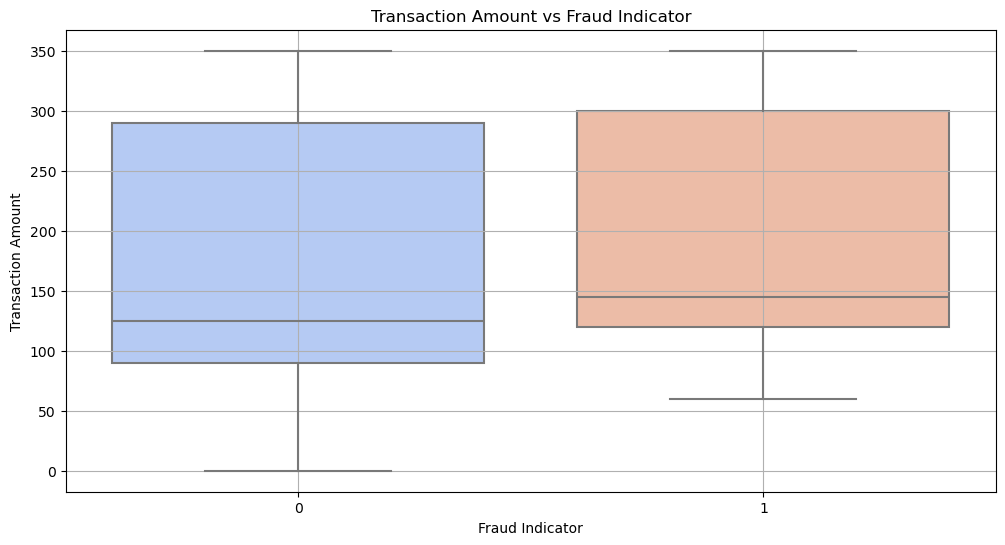

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fraud_indicator', y='Transaction_Amount', data=df, palette='coolwarm')
plt.title('Transaction Amount vs Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.show()


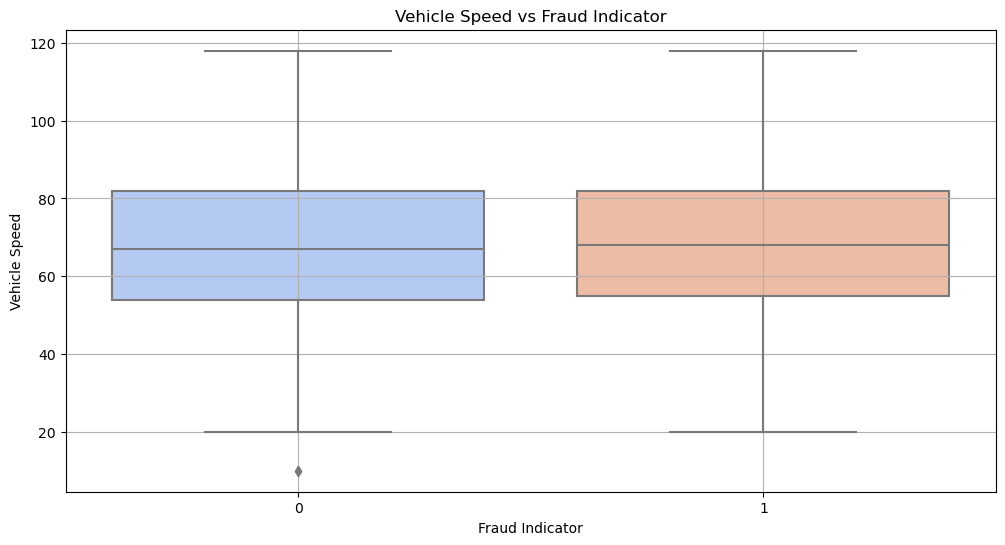

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fraud_indicator', y='Vehicle_Speed', data=df, palette='coolwarm')
plt.title('Vehicle Speed vs Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Vehicle Speed')
plt.grid(True)
plt.show()


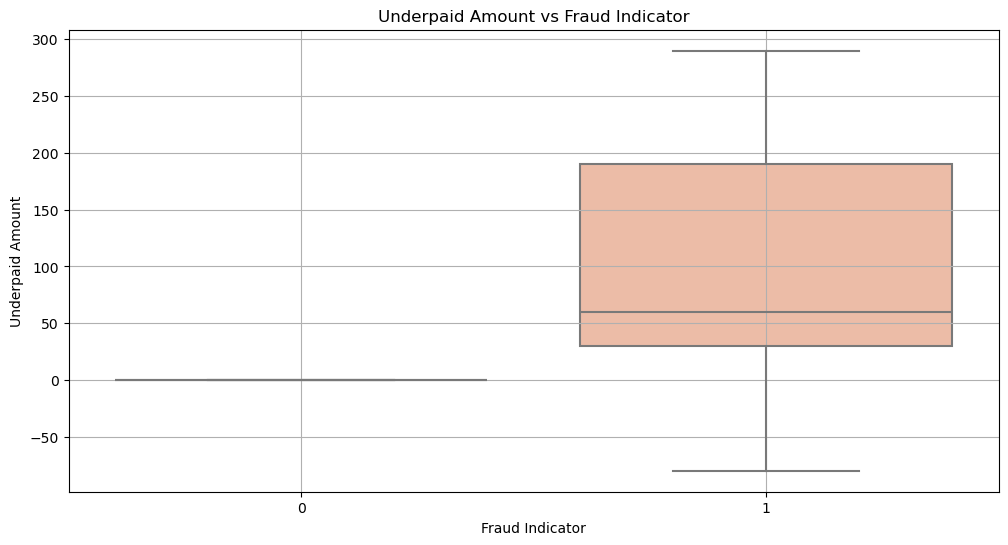

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fraud_indicator', y='Underpaid_Amount', data=df, palette='coolwarm')
plt.title('Underpaid Amount vs Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Underpaid Amount')
plt.grid(True)
plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00      1213

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

Accuracy: 0.9993333333333333


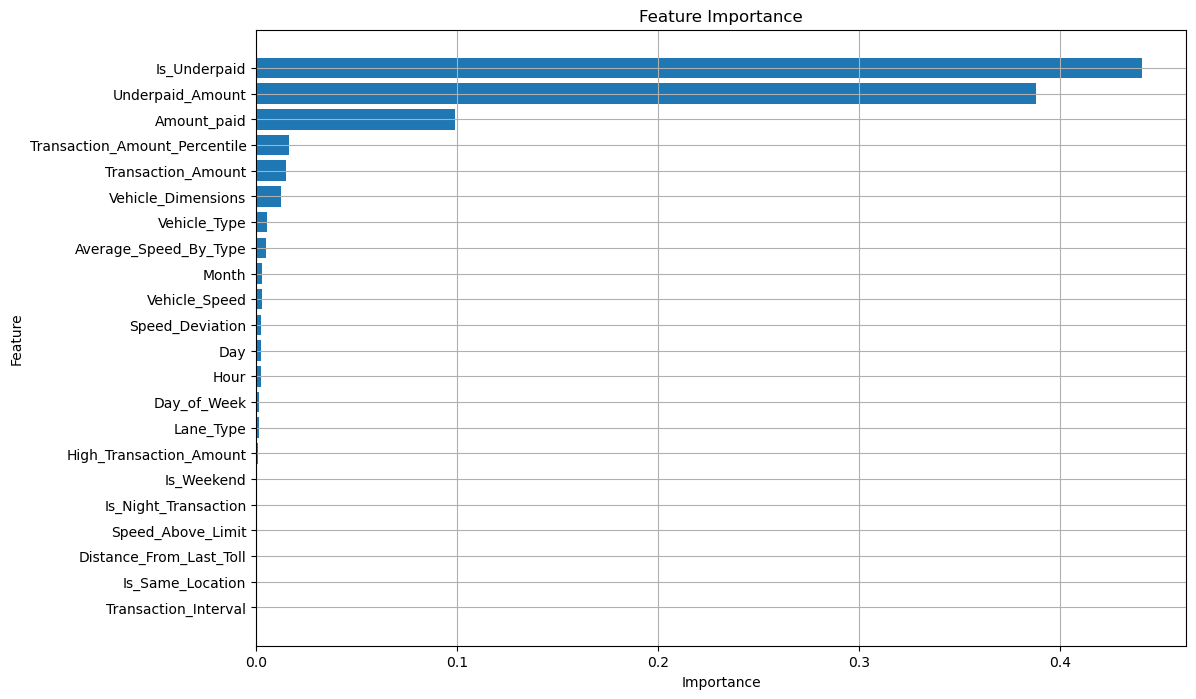

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('FastagFraudDetection_with_features.csv')

# Handle missing values
df.fillna({'FastagID': 'Unknown', 'Prev_Geographical_Location': 'Unknown'}, inplace=True)
df.fillna(0, inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
df['Vehicle_Type'] = label_encoder.fit_transform(df['Vehicle_Type'])
df['Lane_Type'] = label_encoder.fit_transform(df['Lane_Type'])
df['Vehicle_Dimensions'] = label_encoder.fit_transform(df['Vehicle_Dimensions'])
df['Fraud_indicator'] = label_encoder.fit_transform(df['Fraud_indicator'])

# Prepare data for modeling
features = df.drop(columns=['Transaction_ID', 'Timestamp', 'FastagID', 'TollBoothID', 
                            'Vehicle_Plate_Number', 'Geographical_Location', 'Prev_Geographical_Location', 
                            'Prev_Timestamp', 'Fraud_indicator'])
target = df['Fraud_indicator']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_17100\3536363282.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['Latitude'] = fraud_df['Geographical_Location'].apply(lambda x: float(x.split(',')[0].strip('(')))
C:\Users\hp\AppData\Local\Temp\ipykernel_17100\3536363282.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['Longitude'] = fraud_df['Geographical_Location'].apply(lambda x: float(x.split(',')[1].strip(')')))
C:\Users\hp\AppData\Local\Temp\ipykernel_17100\3536363282.py:21: FutureWa

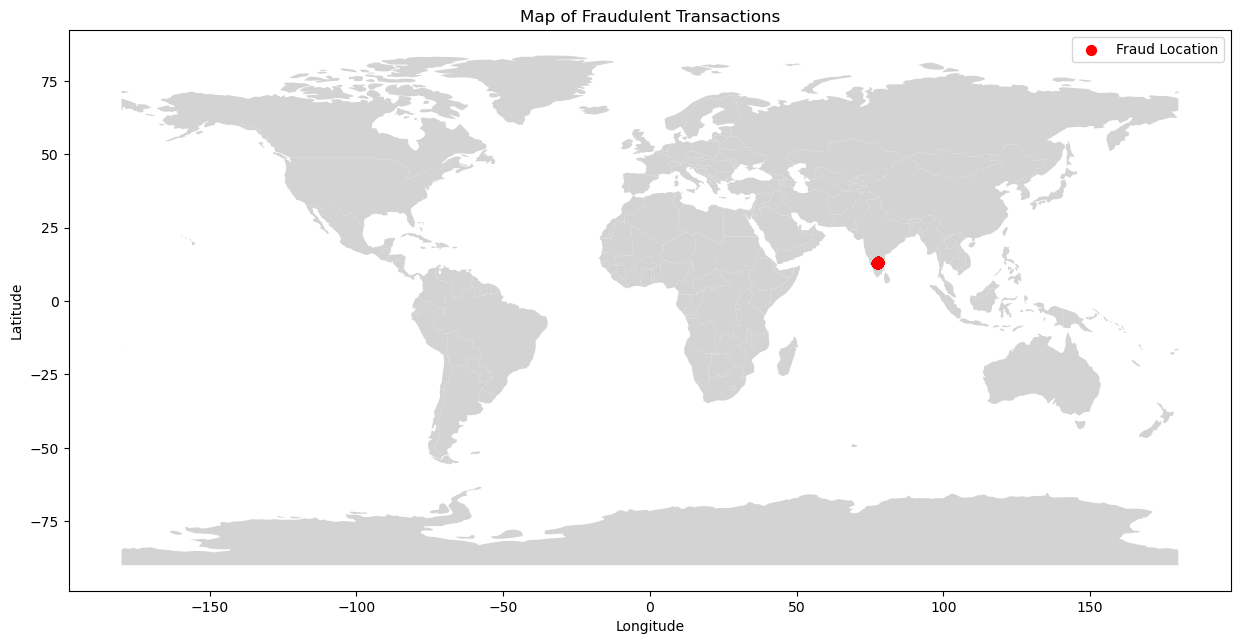

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load the dataset
df = pd.read_csv('FastagFraudDetection_with_features.csv')

# Filter the data for fraudulent transactions
fraud_df = df[df['Fraud_indicator'] == 'Fraud']

# Extract geographical locations
fraud_df['Latitude'] = fraud_df['Geographical_Location'].apply(lambda x: float(x.split(',')[0].strip('(')))
fraud_df['Longitude'] = fraud_df['Geographical_Location'].apply(lambda x: float(x.split(',')[1].strip(')')))

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(fraud_df['Longitude'], fraud_df['Latitude'])]
geo_df = gpd.GeoDataFrame(fraud_df, geometry=geometry)

# Plot the data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')

geo_df.plot(ax=ax, markersize=50, color='red', marker='o', label='Fraud Location')

plt.title('Map of Fraudulent Transactions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()
